# El método de disparo - The Shooting Method

https://www.earthinversion.com/techniques/solving-boundary-value-problems-using-the-shooting-method/

Comencemos considerando el problema genérico de valores en la frontera: 
\begin{equation}
\frac{d^2\vec{y}}{dt^2} = f(t,\vec{y},\frac{d\vec{y}}{dt}) 
\end{equation}
con las condiciones de contorno $t \in [a, b]$
\begin{equation}
y(a) = \alpha
\end{equation}
\begin{equation}
y(b) = \beta
\end{equation}

Los esquemas escalonados considerados hasta ahora para ecuaciones diferenciales de segundo orden implican una elección de las condiciones iniciales  $y(a)$ y  $y'(a)$ . Si queremos resolver el problema anterior en un enfoque de problema de valor inicial, podemos reescribir la ecuación diferencial anterior como se muestra a continuación. 
\begin{equation}
y(a) = \alpha
\end{equation}


Para esta ecuación, necesitamos  $y(a)=α$ , que se conoce. 

\begin{equation}
\frac{dz}{dt} = f\Big(t,\vec{y},\frac{d\vec{y}}{dt}\Big) 
\end{equation}

Para esta ecuación, necesitamos  $z(a)=\kappa$ , donde $\kappa$ es desconocido. Nuestro objetivo aquí es determinar el valor de  $\kappa$ con la restricción  $y(b)=\beta$.


Para esto, podemos definir una función $F=F(\kappa)$: 

\begin{equation}
F(\kappa) = y(b) - \beta 
\end{equation}

Tenemos que encontrar  $\kappa$ tal que  $F(\kappa) = 0$. Esto se convierte en un problema de búsqueda de raíces y sabemos cómo resolver estos problemas.


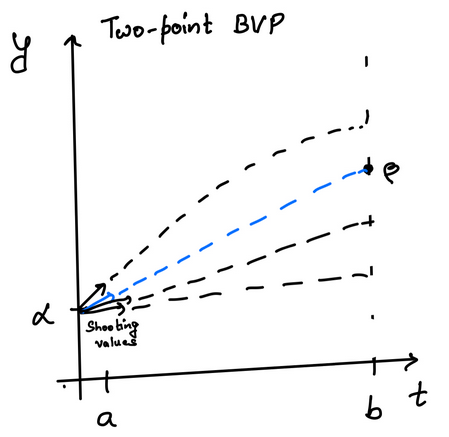

El valor de  $\kappa$ es la pendiente de la función $y$ en  $t = a$.


El método de disparo brinda un procedimiento para determinar iterativamente esta constante A. En otras palabras, aplicaremos nuestro enfoque de problema de valor inicial modificado (el método de Runge-Kutta) para resolver los problemas de frontera. 

### Ejemplo 1

Comencemos con un problema muy simple de caída libre de una pelota bajo el efecto de la gravedad. 

\begin{equation}
\frac{d^2\vec{y}}{dt^2} = -g
\end{equation}

donde,  $g = 9.8 m/s^2$. La condición límite aquí es que comenzamos en  $y = 0$ con velocidad desconocida, pero sabemos que volverá a  $t = 10$.

In [97]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy import optimize
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [98]:
g = 9.8
y0 = 0
tf = 10

In [99]:
def f(t, r):
    y, v = r
    dy_dt = v  # velocity
    d2y_dt2 = -g  # acceleration

    return dy_dt, d2y_dt2

In [100]:
@np.vectorize
def shooting_eval(v0):
    sol = solve_ivp(f, (t[0], t[-1]), (y0, v0), t_eval=t)
    y_num, v = sol.y
    return y_num[-1]

In [101]:
#v0 = 60  # guess the initial velocity
t = np.linspace(0, tf, 51)

48.99999999999992


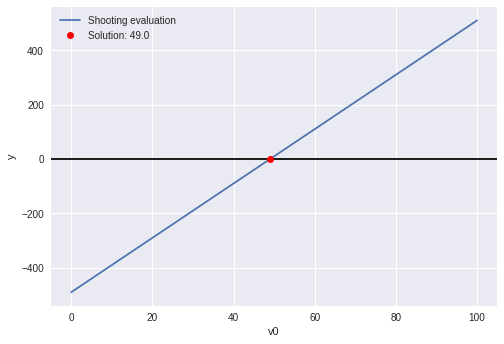

In [102]:
fig, ax = plt.subplots()
v0 = np.linspace(0, 100, 100)
y_sol = shooting_eval(v0)
#print(y_sol)
plt.plot(v0, y_sol, label='Shooting evaluation')
plt.axhline(c="k")


# root finding: secant method (kind of Newton Raphson method where slope is unknown)
# Find a zero of the function func given a nearby starting point x0

v0 = optimize.newton(shooting_eval, 10,maxiter=15)
print(v0)
plt.plot(v0, 0, 'ro', label=f'Solution: {v0:.1f}')

plt.grid(True)
plt.legend()
ax.set_xlabel('v0')
ax.set_ylabel('y')
plt.savefig('example1_solution.png', bbox_inches='tight', dpi=300)
#plt.close()

Aquí encontramos que la velocidad inicial es de 49,0 m/s. 

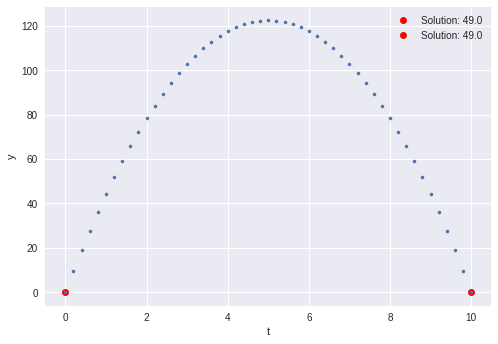

In [106]:
# Plot the path

t = np. linspace(0, tf, 51)
sol = solve_ivp(f, (0, tf), (y0, v0), t_eval=t)
y, v = sol.y

plt.plot(t[0], y0, 'ro', label=f'Solution: {v0:.1f}')
plt.plot(t[-1], 0, 'ro', label=f'Solution: {v0:.1f}')
plt.plot(t, y, ".")

plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.savefig('example1_solution_path.png', bbox_inches='tight', dpi=300)
plt.show()
#plt.close()


### Ejemplo 2

Tomemos otra ecuación diferencial simple para resolver.  

\begin{equation}
\frac{d^2\vec{y}}{dt^2} +3y = 0
\end{equation}

donde, $y(0)=7$ y $y(2 \cdot \pi)=0$.

In [107]:
# example d2y/dt2+3y = 0
# y(0) = 7 and y(2*pi)=0

y0 = 7
tf = 2 * np.pi

In [108]:
v0 = 60  # guess the initial velocity
t = np.linspace(0, 2 * np.pi, 100)

In [109]:
def f(t, r):
    y, v = r
    dy_dt = v  # velocity
    d2y_dt2 = -3 * y  # acceleration

    return dy_dt, d2y_dt2

In [110]:
@np.vectorize
def shooting_eval(v0):
    sol = solve_ivp(f, (t[0], t[-1]), (y0, v0), t_eval=t)
    y_num, v = sol.y
    return y_num[-1]

-1.3366717449747614


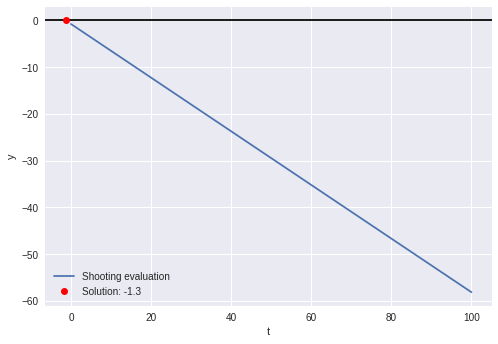

In [111]:
fig, ax = plt.subplots()
v0 = np.linspace(0, 100, 100)
plt.plot(v0, shooting_eval(v0), label='Shooting evaluation')
plt.axhline(c="k")


# root finding: secant method (kind of Newton Raphson method where slope is unknown)
# Find a zero of the function func given a nearby starting point x0
v0 = optimize.newton(shooting_eval, 5)
print(v0)
plt.plot(v0, 0, 'ro', label=f'Solution: {v0:.1f}')

plt.grid(True)
plt.legend()
ax.set_xlabel('t')
ax.set_ylabel('y')
plt.savefig('example2_solution.png', bbox_inches='tight', dpi=300)

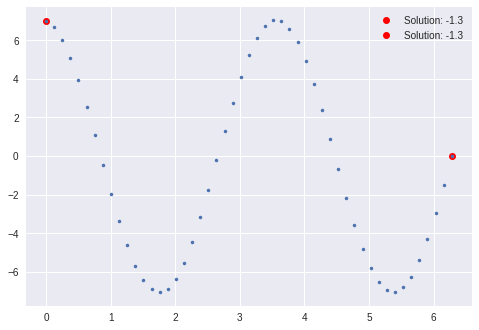

In [113]:
# Plot the path

t = np. linspace(0, tf, 51)
sol = solve_ivp(f, (0, tf), (y0, v0), t_eval=t)
y, v = sol.y

plt.plot(t[0], y0, 'ro', label=f'Solution: {v0:.1f}')
plt.plot(t[-1], 0, 'ro', label=f'Solution: {v0:.1f}')
plt.plot(t, y, ".")
plt.legend()
plt.show()
#plt.savefig('example2_solution_path.png', bbox_inches='tight', dpi=300)
#plt.close()

#### Referencias

    Kutz, JN (2013). Modelado basado en datos y computación científica: métodos para sistemas complejos y big data. Prensa de la Universidad de Oxford.
